<a href="https://colab.research.google.com/github/kikiru328/enterprise_analysis/blob/main/xgggggggggggggggg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,366 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading datab

In [ ]:
#  Directory 변경 (모듈이용)
%pwd
%cd '../content/notebooks'

# module import
## Data Load
from pickle5 import pickle 

## Basic module
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#waring
import warnings
warnings.filterwarnings('ignore')

/content/drive/My Drive/Colab Notebooks


In [ ]:
all_cols = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
apps_col = ['고객번호', '성별', '연령대', '거주지역', '객단가_Net', '객단가_abs', 
            '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
pr_col = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs','wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
amt_col = ['고객번호', '성별', '연령대', '거주지역', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
pr_amt = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
app_ratio = ['고객번호', '성별', '연령대', '거주지역', '가공식품_r_Net', '가공식품_r_abs',
       '가구/인테리어_r_Net', '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs',
       '기타_r_Net', '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net',
       '명품_r_abs', '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs',
       '일상용품_r_Net', '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs',
       '패션잡화_r_Net', '패션잡화_r_abs', '객단가_Net', '객단가_abs',  '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
app_amt = ['고객번호', '성별', '연령대', '거주지역', '패션잡화_r_abs', '객단가_Net', '객단가_abs', '가공식품_구매금액_r_Net',
       '가공식품_구매금액_r_abs', '가구/인테리어_구매금액_r_Net', '가구/인테리어_구매금액_r_abs',
       '교육/문화용품_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '기타_구매금액_r_Net',
       '기타_구매금액_r_abs', '디지털/가전_구매금액_r_Net', '디지털/가전_구매금액_r_abs',
       '명품_구매금액_r_Net', '명품_구매금액_r_abs', '신선식품_구매금액_r_Net', '신선식품_구매금액_r_abs',
       '의류_구매금액_r_Net', '의류_구매금액_r_abs', '일상용품_구매금액_r_Net', '일상용품_구매금액_r_abs',
       '전문스포츠/레저_구매금액_r_Net', '전문스포츠/레저_구매금액_r_abs', '패션잡화_구매금액_r_Net',
       '패션잡화_구매금액_r_abs', '가공식품_app_r_Net', '가공식품_app_r_abs',
       '가구/인테리어_app_r_Net', '가구/인테리어_app_r_abs', '교육/문화용품_app_r_Net',
       '교육/문화용품_app_r_abs', '기타_app_r_Net', '기타_app_r_abs', '디지털/가전_app_r_Net',
       '디지털/가전_app_r_abs', '명품_app_r_Net', '명품_app_r_abs', '신선식품_app_r_Net',
       '신선식품_app_r_abs', '의류_app_r_Net', '의류_app_r_abs', '일상용품_app_r_Net',
       '일상용품_app_r_abs', '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_abs',
       '패션잡화_app_r_Net', '패션잡화_app_r_abs', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
nothing = ['고객번호', '성별', '연령대', '거주지역','객단가_Net', '객단가_abs',  'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', 'Frequency_Net', 'Frequency_abs',
       'Recency_Net', 'Recency_abs', 'membership_abs', 'target']

In [ ]:
test_df = ['고객번호', '성별', '연령대', '거주지역', 'wdys_ratio_Net', 'wdys_ratio_abs',
       'mor_ratio_Net', 'mor_ratio_abs', 'A_ratio_Net', 'A_ratio_abs',
       'B_ratio_Net', 'B_ratio_abs', 'C_ratio_Net', 'C_ratio_abs',
       'D_ratio_Net', 'D_ratio_abs', '가공식품_r_Net', '가공식품_r_abs', '가구/인테리어_r_Net',
       '가구/인테리어_r_abs', '교육/문화용품_r_Net', '교육/문화용품_r_abs', '기타_r_Net',
       '기타_r_abs', '디지털/가전_r_Net', '디지털/가전_r_abs', '명품_r_Net', '명품_r_abs',
       '신선식품_r_Net', '신선식품_r_abs', '의류_r_Net', '의류_r_abs', '일상용품_r_Net',
       '일상용품_r_abs', '전문스포츠/레저_r_Net', '전문스포츠/레저_r_abs', '패션잡화_r_Net',
       '패션잡화_r_abs', 'Frequency_Net', 'Frequency_abs', 'Recency_Net',
       'Recency_abs', 'target']

In [ ]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123.pkl','rb') as train123:
  trdf = pickle.load(train123)  

In [ ]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    # plt.figure(figsize=(30,15))
    # print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    # print(cr_v)
    # print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    A = print(dict(cond))
    return A  

In [ ]:
df = trdf.copy()
df.columns

Index(['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs',
       'H1_객_Net', 'H1_객_Abs', 'H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs', 'H1_가공식품_app_Net',
       'H1_가공식품_ap

In [ ]:
all_cols = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_객_Net', 'H1_객_Abs',
      'H1_가공식품_Net','H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs',
        'H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs', 'H1_가공식품_app_Net',
       'H1_가공식품_app_Abs', 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_app_Abs',
       'H1_교육/문화용품_app_Net', 'H1_교육/문화용품_app_Abs', 'H1_기타_app_Net',
       'H1_기타_app_Abs', 'H1_디지털/가전_app_Net', 'H1_디지털/가전_app_Abs',
       'H1_명품_app_Net', 'H1_명품_app_Abs', 'H1_신선식품_app_Net', 'H1_신선식품_app_Abs',
       'H1_의류_app_Net', 'H1_의류_app_Abs', 'H1_일상용품_app_Net', 'H1_일상용품_app_Abs',
       'H1_전문스포츠/레저_app_Net', 'H1_전문스포츠/레저_app_Abs', 'H1_패션잡화_app_Net',
       'H1_패션잡화_app_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [ ]:
test1 = df[all_cols]
print(get_corr(test1,0.69,1))
print()
lgml(test1)

{'H1_의류_구매금액_Net': 'H1_의류_Net', 'H1_의류_app_Net': 'H1_의류_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs': 'H1_전문스포츠/레저_Abs', 'H1_전문스포츠/레저_Abs': 'H1_전문스포츠/레저_구매금액_Abs', 'H1_패션잡화_구매금액_Net': 'H1_패션잡화_app_Net', 'H1_패션잡화_Net': 'H1_패션잡화_구매금액_Net', 'H1_의류_Net': 'H1_의류_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Net': 'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_app_Net': 'H1_전문스포츠/레저_구매금액_Net', 'H1_가구/인테리어_구매금액_Net': 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_Net': 'H1_가구/인테리어_구매금액_Net', 'H1_패션잡화_app_Net': 'H1_패션잡화_구매금액_Net', 'H1_가구/인테리어_app_Net': 'H1_가구/인테리어_구매금액_Net', 'H1_전문스포츠/레저_Net': 'H1_전문스포츠/레저_구매금액_Net', 'H1_교육/문화용품_app_Net': 'H1_교육/문화용품_구매금액_Net', 'H1_교육/문화용품_Net': 'H1_교육/문화용품_구매금액_Net', 'H1_교육/문화용품_app_Abs': 'H1_교육/문화용품_구매금액_Abs', 'H1_교육/문화용품_Abs': 'H1_교육/문화용품_구매금액_Abs', 'H1_교육/문화용품_구매금액_Abs': 'H1_교육/문화용품_Abs', 'H1_교육/문화용품_구매금액_Net': 'H1_교육/문화용품_Net', 'H1_기타_app_Net': 'H1_기타_구매금액_Net', 'H1_기타_Net': 'H1_기타_구매금액_Net', 'H1_기타_app_Abs': 'H1_기타_구매금액_Abs', 'H1_기타_Abs': 'H1_기타_구매금액_Abs', 'H1_기타_구매금액_Abs': 'H1_기타_Abs', 'H1_기타_구매금액_Net': 'H1_

In [ ]:
test2_ratio_cols = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs',
       'H1_객_Net', 'H1_객_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [ ]:
test2 = df[test2_ratio_cols]
print(get_corr(test2,0.69,1))
print()
lgml(test2)

{}
None

0.8249934503536809


In [ ]:
test3_amt = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 
       'H1_객_Net', 'H1_객_Abs', 'H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs',  'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [ ]:
test3 = df[test3_amt]
print(get_corr(test3,0.69,1))
print()
lgml(test3)

{}
None

0.8270893371757925


In [ ]:
test4_app = ['고객번호', '성별', '연령대', '거주지역', 'membership_abs', 'H1_객_Net', 'H1_객_Abs',
       'H1_가공식품_app_Net',
       'H1_가공식품_app_Abs', 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_app_Abs',
       'H1_교육/문화용품_app_Net', 'H1_교육/문화용품_app_Abs', 'H1_기타_app_Net',
       'H1_기타_app_Abs', 'H1_디지털/가전_app_Net', 'H1_디지털/가전_app_Abs',
       'H1_명품_app_Net', 'H1_명품_app_Abs', 'H1_신선식품_app_Net', 'H1_신선식품_app_Abs',
       'H1_의류_app_Net', 'H1_의류_app_Abs', 'H1_일상용품_app_Net', 'H1_일상용품_app_Abs',
       'H1_전문스포츠/레저_app_Net', 'H1_전문스포츠/레저_app_Abs', 'H1_패션잡화_app_Net',
       'H1_패션잡화_app_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']

In [ ]:
test4 = df[test4_app]
print(get_corr(test4,0.69,1))
print()
lgml(test4)

{}
None

0.8265653654702646


In [ ]:
def really(columns):
  global test1
  ratio = test1.corr()[columns].iloc[-1:].T
  ratio['target'] = np.abs(ratio['target'])
  A = ratio.sort_values(by='target',ascending=False)
  print(A)
  return A

In [ ]:
ratio = test1.corr()[[ 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs']].iloc[-1:].T
ratio['target'] = np.abs(ratio['target'])
ratio.sort_values(by='target',ascending=False)

,target
H1_의류_Net,0.165733
H1_명품_Net,0.146592
H1_패션잡화_Net,0.127242
H1_디지털/가전_Net,0.122415
H1_전문스포츠/레저_Net,0.116531
H1_가공식품_Net,0.095354
H1_가구/인테리어_Net,0.091653
H1_교육/문화용품_Net,0.052229
H1_가공식품_Abs,0.038503
H1_가구/인테리어_Abs,0.037036


In [ ]:
def really(columns):
  global test1
  ratio = test1.corr()[columns].iloc[-1:].T
  ratio['target'] = np.abs(ratio['target'])
  A = ratio.sort_values(by='target',ascending=False)
  return A

In [ ]:
A = [ 'H1_가공식품_Net',
       'H1_가공식품_Abs', 'H1_가구/인테리어_Net', 'H1_가구/인테리어_Abs', 'H1_교육/문화용품_Net',
       'H1_교육/문화용품_Abs', 'H1_기타_Net', 'H1_기타_Abs', 'H1_디지털/가전_Net',
       'H1_디지털/가전_Abs', 'H1_명품_Net', 'H1_명품_Abs', 'H1_신선식품_Net', 'H1_신선식품_Abs',
       'H1_의류_Net', 'H1_의류_Abs', 'H1_일상용품_Net', 'H1_일상용품_Abs',
       'H1_전문스포츠/레저_Net', 'H1_전문스포츠/레저_Abs', 'H1_패션잡화_Net', 'H1_패션잡화_Abs']
really(A)

,target
H1_의류_Net,0.165733
H1_명품_Net,0.146592
H1_패션잡화_Net,0.127242
H1_디지털/가전_Net,0.122415
H1_전문스포츠/레저_Net,0.116531
H1_가공식품_Net,0.095354
H1_가구/인테리어_Net,0.091653
H1_교육/문화용품_Net,0.052229
H1_가공식품_Abs,0.038503
H1_가구/인테리어_Abs,0.037036


In [ ]:
amt =['H1_가공식품_구매금액_Net', 'H1_가공식품_구매금액_Abs',
       'H1_가구/인테리어_구매금액_Net', 'H1_가구/인테리어_구매금액_Abs', 'H1_교육/문화용품_구매금액_Net',
       'H1_교육/문화용품_구매금액_Abs', 'H1_기타_구매금액_Net', 'H1_기타_구매금액_Abs',
       'H1_디지털/가전_구매금액_Net', 'H1_디지털/가전_구매금액_Abs', 'H1_명품_구매금액_Net',
       'H1_명품_구매금액_Abs', 'H1_신선식품_구매금액_Net', 'H1_신선식품_구매금액_Abs',
       'H1_의류_구매금액_Net', 'H1_의류_구매금액_Abs', 'H1_일상용품_구매금액_Net',
       'H1_일상용품_구매금액_Abs', 'H1_전문스포츠/레저_구매금액_Net', 'H1_전문스포츠/레저_구매금액_Abs',
       'H1_패션잡화_구매금액_Net', 'H1_패션잡화_구매금액_Abs']
really(amt)

,target
H1_가공식품_구매금액_Net,0.256376
H1_신선식품_구매금액_Net,0.187228
H1_명품_구매금액_Net,0.153038
H1_일상용품_구매금액_Net,0.150200
H1_의류_구매금액_Net,0.135399
H1_디지털/가전_구매금액_Net,0.130217
H1_패션잡화_구매금액_Net,0.106675
H1_가구/인테리어_구매금액_Net,0.070618
H1_전문스포츠/레저_구매금액_Net,0.064520
H1_교육/문화용품_구매금액_Net,0.037582


In [ ]:
app = ['H1_가공식품_app_Net',
       'H1_가공식품_app_Abs', 'H1_가구/인테리어_app_Net', 'H1_가구/인테리어_app_Abs',
       'H1_교육/문화용품_app_Net', 'H1_교육/문화용품_app_Abs', 'H1_기타_app_Net',
       'H1_기타_app_Abs', 'H1_디지털/가전_app_Net', 'H1_디지털/가전_app_Abs',
       'H1_명품_app_Net', 'H1_명품_app_Abs', 'H1_신선식품_app_Net', 'H1_신선식품_app_Abs',
       'H1_의류_app_Net', 'H1_의류_app_Abs', 'H1_일상용품_app_Net', 'H1_일상용품_app_Abs',
       'H1_전문스포츠/레저_app_Net', 'H1_전문스포츠/레저_app_Abs', 'H1_패션잡화_app_Net',
       'H1_패션잡화_app_Abs']

really(app)

,target
H1_의류_app_Net,0.247412
H1_패션잡화_app_Net,0.194028
H1_가구/인테리어_app_Net,0.163985
H1_명품_app_Net,0.163051
H1_전문스포츠/레저_app_Net,0.160183
H1_일상용품_app_Net,0.156266
H1_가공식품_app_Net,0.143744
H1_디지털/가전_app_Net,0.136280
H1_신선식품_app_Net,0.110110
H1_교육/문화용품_app_Net,0.057439


# 권준기가 날 죽일라고 함

## defalut

In [ ]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123.pkl','rb') as train123:
  findf = pickle.load(train123)  

In [ ]:
tr_test = findf[['성별', '연령대', '거주지역', 'membership_abs', '객단가_Net', '객단가_Abs',
       '가공식품_app_r_Net', '가공식품_app_r_Abs', '가구/인테리어_app_r_Net',
       '가구/인테리어_app_r_Abs', '교육/문화용품_app_r_Net', '교육/문화용품_app_r_Abs',
       '기타_app_r_Net', '기타_app_r_Abs', '디지털/가전_app_r_Net', '디지털/가전_app_r_Abs',
       '명품_app_r_Net', '명품_app_r_Abs', '신선식품_app_r_Net', '신선식품_app_r_Abs',
       '의류_app_r_Net', '의류_app_r_Abs', '일상용품_app_r_Net', '일상용품_app_r_Abs',
       '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_Abs', '패션잡화_app_r_Net',
       '패션잡화_app_r_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']]

In [ ]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    # plt.figure(figsize=(30,15))
    # print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    # print(cr_v)
    # print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    A = print(dict(cond))
    return A  

In [ ]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/다중공선성완료_123.pkl','wb') as save_df:
  pickle.dump(tr_test,save_df)  

In [ ]:
get_corr(tr_test,0.69,1)

{}


In [ ]:
from sklearn.model_selection import train_test_split
X = tr_test.drop('target',axis=1)
y = tr_test['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
svm = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

from tqdm import tqdm

models = [lr,svm,dt_clf,rf_clf]
for model in tqdm(models):
    model.fit(X_train,y_train)

def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(X_test)
    # globals()[f'{varName(model)}_pred_proba'] = model.predict_proba(X_test)

100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


In [ ]:
svm_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    acc_score = accuracy_score(y_test, predict)
    print('{}_score : {}', model, acc_score)

In [ ]:
def get_eval(y_test,prediction):
  from sklearn.metrics import confusion_matrix , precision_score, accuracy_score, recall_score, f1_score
  Label = np.unique([y_test, prediction])
  confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                          index=['true:{:}'.format(x) for x in Label], 
                          columns=['pred:{:}'.format(x) for x in Label])
  accuracy = accuracy_score(y_test,prediction)
  precision = precision_score(y_test,prediction)
  recall = recall_score(y_test,prediction)
  f1 = f1_score(y_test,prediction)
  # roc_auc = roc_auc_score(y_test,proba)
  # print('[model]:', model,'\n')
  print('\n[confusion_matrix]\n\n', confusion,'\n')
  print('[accuracy]: {:.4f}'.format(accuracy))
  print('[precision]: {:.4f}'.format(accuracy))
  print('[recall]: {:.4f}'.format(recall))
  print('[f1_score]: {:.4f}'.format(f1))
  # print('[roc_auc]: {:.4f}'.format(roc_auc))
  print('-------'*10)

In [ ]:
predicts = [lr_pred,svm_pred,dt_clf_pred,rf_clf_pred]
for predict in tqdm(predicts):
  get_eval(y_test,predict)

100%|██████████| 4/4 [00:00<00:00, 61.24it/s]


[confusion_matrix]

         pred:0  pred:1
true:0    1602     334
true:1     327    1554 

[accuracy]: 0.8268
[precision]: 0.8268
[recall]: 0.8262
[f1_score]: 0.8246
----------------------------------------------------------------------

[confusion_matrix]

         pred:0  pred:1
true:0    1578     358
true:1     348    1533 

[accuracy]: 0.8150
[precision]: 0.8150
[recall]: 0.8150
[f1_score]: 0.8128
----------------------------------------------------------------------

[confusion_matrix]

         pred:0  pred:1
true:0    1455     481
true:1     440    1441 

[accuracy]: 0.7587
[precision]: 0.7587
[recall]: 0.7661
[f1_score]: 0.7578
----------------------------------------------------------------------

[confusion_matrix]

         pred:0  pred:1
true:0    1605     331
true:1     322    1559 

[accuracy]: 0.8289
[precision]: 0.8289
[recall]: 0.8288
[f1_score]: 0.8268
----------------------------------------------------------------------


In [ ]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234.pkl','rb') as test_df:
  test_df = pickle.load(test_df)

In [ ]:
test = test_df[['성별', '연령대', '거주지역', 'membership_abs', '객단가_Net', '객단가_Abs',
       '가공식품_app_r_Net', '가공식품_app_r_Abs', '가구/인테리어_app_r_Net',
       '가구/인테리어_app_r_Abs', '교육/문화용품_app_r_Net', '교육/문화용품_app_r_Abs',
       '기타_app_r_Net', '기타_app_r_Abs', '디지털/가전_app_r_Net', '디지털/가전_app_r_Abs',
       '명품_app_r_Net', '명품_app_r_Abs', '신선식품_app_r_Net', '신선식품_app_r_Abs',
       '의류_app_r_Net', '의류_app_r_Abs', '일상용품_app_r_Net', '일상용품_app_r_Abs',
       '전문스포츠/레저_app_r_Net', '전문스포츠/레저_app_r_Abs', '패션잡화_app_r_Net',
       '패션잡화_app_r_Abs', 'wdys_ratio_Net', 'wdys_ratio_Abs', 'mor_ratio_Net',
       'mor_ratio_Abs', 'A_ratio_Net', 'A_ratio_Abs', 'B_ratio_Net',
       'B_ratio_Abs', 'C_ratio_Net', 'C_ratio_Abs', 'D_ratio_Net',
       'D_ratio_Abs', 'Frequency_Net', 'Frequency_Abs', 'Recency_Net',
       'Recency_Abs', 'target']]

In [ ]:
with open('/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/다중공선성고려완료_1234.pkl','wb') as save_df:
  pickle.dump(test,save_df)

In [ ]:
get_corr(test,0.69,1)

{}


In [ ]:
test.shape

(19085, 45)

In [ ]:
검증 = test.drop('target',axis=1)
검증

,성별,연령대,거주지역,membership_abs,객단가_Net,객단가_Abs,가공식품_app_r_Net,가공식품_app_r_Abs,가구/인테리어_app_r_Net,가구/인테리어_app_r_Abs,교육/문화용품_app_r_Net,교육/문화용품_app_r_Abs,기타_app_r_Net,기타_app_r_Abs,디지털/가전_app_r_Net,디지털/가전_app_r_Abs,명품_app_r_Net,명품_app_r_Abs,신선식품_app_r_Net,신선식품_app_r_Abs,의류_app_r_Net,의류_app_r_Abs,일상용품_app_r_Net,일상용품_app_r_Abs,전문스포츠/레저_app_r_Net,전문스포츠/레저_app_r_Abs,패션잡화_app_r_Net,패션잡화_app_r_Abs,wdys_ratio_Net,wdys_ratio_Abs,mor_ratio_Net,mor_ratio_Abs,A_ratio_Net,A_ratio_Abs,B_ratio_Net,B_ratio_Abs,C_ratio_Net,C_ratio_Abs,D_ratio_Net,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs
0,0,5,20,0.000000,0,0,-2,12,1,11,-1,5,0,0,0,10,0,0,8,10,-7,11,-3,15,-8,8,-4,12,-2,4,-4,4,-1,1,1,1,0,6,0,0,-4,8,3,3
1,0,6,14,0.000000,0,0,6,12,-2,8,-7,7,0,0,-1,5,2,10,-8,24,0,6,-3,13,6,8,3,11,3,3,-3,3,0,2,-1,5,3,3,5,5,-1,5,-5,9
2,0,7,1,0.000000,-1,3,-7,7,-2,8,2,10,-6,6,-4,8,-6,16,-5,19,-3,9,5,15,-2,6,2,4,-1,3,3,5,-1,1,0,0,0,6,0,0,1,5,-2,6
3,0,3,7,0.000000,2,4,-8,8,5,7,0,0,0,0,2,10,-6,6,-8,12,5,7,-2,16,1,5,6,8,-6,16,2,8,-1,3,-1,3,5,5,0,0,-4,6,-7,7
4,0,6,18,0.000000,1,1,4,8,4,14,0,4,6,16,1,9,5,7,4,6,3,5,4,6,-8,12,-1,5,3,9,-1,1,1,1,0,0,2,2,0,0,-3,3,-5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,0,1,1,0.000000,-2,2,6,6,0,16,0,0,0,12,0,0,0,0,0,18,6,24,-1,3,8,22,0,0,3,13,3,3,4,12,0,6,0,0,0,0,2,2,0,10
19081,0,1,1,1.000000,-2,4,-6,18,4,20,0,14,0,0,0,0,6,6,0,18,6,10,-4,12,8,8,0,16,1,11,-1,3,4,6,2,6,0,6,0,0,2,2,-1,15
19082,1,5,30,0.000000,-3,7,1,17,0,0,0,0,0,0,0,0,0,0,0,18,0,0,-1,13,0,0,8,8,-8,10,4,4,4,4,0,0,5,9,0,0,0,0,2,2
19083,0,1,33,0.000000,0,2,-7,17,0,0,0,0,0,0,0,0,0,0,0,0,0,18,-1,3,0,0,0,0,7,7,2,4,0,6,2,2,0,0,0,0,0,4,0,14


In [ ]:
final_prediction = lr.predict(검증)

In [ ]:
정확도검증 = test['target']
정확도검증

0        1
1        0
2        1
3        0
4        1
        ..
19080    0
19081    0
19082    1
19083    0
19084    0
Name: target, Length: 19085, dtype: int64

In [ ]:
get_eval(정확도검증,final_prediction)


[confusion_matrix]

         pred:0  pred:1
true:0    8218     943
true:1    2286    7638 

[accuracy]: 0.8308
[precision]: 0.8308
[recall]: 0.7696
[f1_score]: 0.8255
----------------------------------------------------------------------


# 모델완성

In [ ]:
test_df

,성별,연령대,거주지역,membership_abs,객단가_Net,객단가_Abs,가공식품_r_Net,가공식품_r_Abs,가구/인테리어_r_Net,가구/인테리어_r_Abs,교육/문화용품_r_Net,교육/문화용품_r_Abs,기타_r_Net,기타_r_Abs,디지털/가전_r_Net,디지털/가전_r_Abs,명품_r_Net,명품_r_Abs,신선식품_r_Net,신선식품_r_Abs,의류_r_Net,의류_r_Abs,일상용품_r_Net,일상용품_r_Abs,전문스포츠/레저_r_Net,전문스포츠/레저_r_Abs,패션잡화_r_Net,패션잡화_r_Abs,가공식품_구매금액_r_Net,가공식품_구매금액_r_Abs,가구/인테리어_구매금액_r_Net,가구/인테리어_구매금액_r_Abs,교육/문화용품_구매금액_r_Net,교육/문화용품_구매금액_r_Abs,기타_구매금액_r_Net,기타_구매금액_r_Abs,디지털/가전_구매금액_r_Net,디지털/가전_구매금액_r_Abs,명품_구매금액_r_Net,명품_구매금액_r_Abs,...,패션잡화_구매금액_r_Abs,가공식품_app_r_Net,가공식품_app_r_Abs,가구/인테리어_app_r_Net,가구/인테리어_app_r_Abs,교육/문화용품_app_r_Net,교육/문화용품_app_r_Abs,기타_app_r_Net,기타_app_r_Abs,디지털/가전_app_r_Net,디지털/가전_app_r_Abs,명품_app_r_Net,명품_app_r_Abs,신선식품_app_r_Net,신선식품_app_r_Abs,의류_app_r_Net,의류_app_r_Abs,일상용품_app_r_Net,일상용품_app_r_Abs,전문스포츠/레저_app_r_Net,전문스포츠/레저_app_r_Abs,패션잡화_app_r_Net,패션잡화_app_r_Abs,wdys_ratio_Net,wdys_ratio_Abs,mor_ratio_Net,mor_ratio_Abs,A_ratio_Net,A_ratio_Abs,B_ratio_Net,B_ratio_Abs,C_ratio_Net,C_ratio_Abs,D_ratio_Net,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs,target
0,0,5,20,0.000000,0,0,-2,4,0,4,2,4,0,0,1,9,0,0,0,0,0,0,3,5,-4,6,-2,8,0,0,1,1,0,2,0,0,1,7,0,0,...,2,-2,12,1,11,-1,5,0,0,0,10,0,0,8,10,-7,11,-3,15,-8,8,-4,12,-2,4,-4,4,-1,1,1,1,0,6,0,0,-4,8,3,3,1
1,0,6,14,0.000000,0,0,2,2,0,0,-7,7,0,0,-1,1,0,10,-2,4,2,8,-1,7,1,1,2,4,0,2,-3,5,-5,5,0,0,-2,4,0,10,...,7,6,12,-2,8,-7,7,0,0,-1,5,2,10,-8,24,0,6,-3,13,6,8,3,11,3,3,-3,3,0,2,-1,5,3,3,5,5,-1,5,-5,9,0
2,0,7,1,0.000000,-1,3,0,0,0,0,-1,7,-3,3,-4,4,-6,18,1,1,-1,1,0,2,-1,1,1,1,1,5,1,1,0,8,-3,3,-4,8,-6,18,...,5,-7,7,-2,8,2,10,-6,6,-4,8,-6,16,-5,19,-3,9,5,15,-2,6,2,4,-1,3,3,5,-1,1,0,0,0,6,0,0,1,5,-2,6,1
3,0,3,7,0.000000,2,4,3,7,3,7,0,0,0,0,1,11,-6,6,-1,9,-2,2,-3,5,0,2,-1,3,-2,2,4,12,0,0,0,0,2,10,-6,6,...,1,-8,8,5,7,0,0,0,0,2,10,-6,6,-8,12,5,7,-2,16,1,5,6,8,-6,16,2,8,-1,3,-1,3,5,5,0,0,-4,6,-7,7,0
4,0,6,18,0.000000,1,1,1,1,0,4,1,1,4,12,1,7,6,6,-2,2,1,1,5,5,-4,14,1,1,0,0,0,4,-1,1,3,9,1,7,6,6,...,3,4,8,4,14,0,4,6,16,1,9,5,7,4,6,3,5,4,6,-8,12,-1,5,3,9,-1,1,1,1,0,0,2,2,0,0,-3,3,-5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,0,1,1,0.000000,-2,2,4,6,0,8,0,0,0,8,0,0,0,0,0,0,4,14,0,0,4,14,0,0,3,3,0,6,0,0,0,6,0,0,0,0,...,0,6,6,0,16,0,0,0,12,0,0,0,0,0,18,6,24,-1,3,8,22,0,0,3,13,3,3,4,12,0,6,0,0,0,0,2,2,0,10,0
19081,0,1,1,1.000000,-2,4,0,4,5,11,0,8,0,0,0,0,5,5,0,0,5,11,0,0,4,4,0,6,0,0,6,16,0,8,0,0,0,0,4,4,...,2,-6,18,4,20,0,14,0,0,0,0,6,6,0,18,6,10,-4,12,8,8,0,16,1,11,-1,3,4,6,2,6,0,6,0,0,2,2,-1,15,0
19082,1,5,30,0.000000,-3,7,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,1,1,0,0,0,0,0,0,0,0,0,0,...,8,1,17,0,0,0,0,0,0,0,0,0,0,0,18,0,0,-1,13,0,0,8,8,-8,10,4,4,4,4,0,0,5,9,0,0,0,0,2,2,1
19083,0,1,33,0.000000,0,2,-3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,-2,4,0,0,0,0,0,0,0,0,0,0,...,0,-7,17,0,0,0,0,0,0,0,0,0,0,0,0,0,18,-1,3,0,0,0,0,7,7,2,4,0,6,2,2,0,0,0,0,0,4,0,14,0


In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


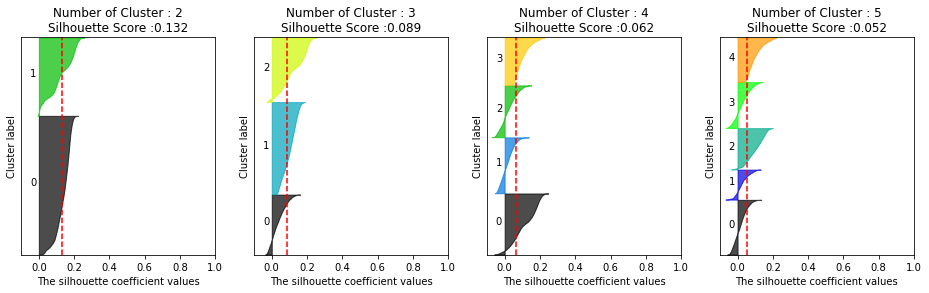

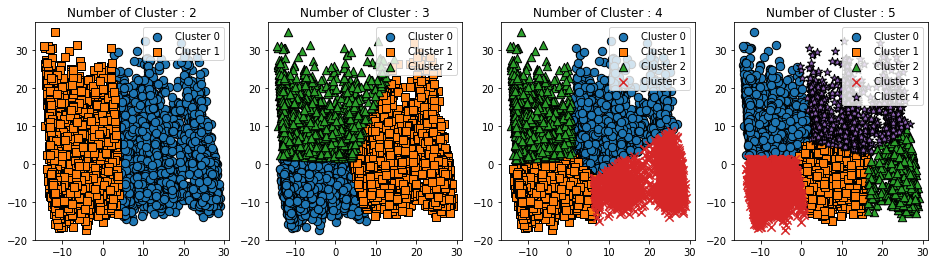

In [ ]:
visualize_silhouette([ 2, 3, 4, 5], test_df[test_df['target']==1])
visualize_kmeans_plot_multi([2,3,4,5],test_df[test_df['target']==1])

# Test2
## 산술평균

In [ ]:
print(train.shape)
print(test.shape)

(19085, 45)
(19085, 45)


In [ ]:
# Default
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/다중공선성완료_123.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/다중공선성고려완료_1234.pkl'

In [ ]:
# 산술평균
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_산술평균.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_산술평균.pkl'

In [ ]:
# 산술평균 std
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_산술평균_std.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_산술평균_std.pkl'

In [ ]:
# std
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std.pkl'

In [ ]:
train

,성별,연령대,거주지역,membership_abs,객단가_Net,객단가_Abs,가공식품_app_r_Net,가공식품_app_r_Abs,가구/인테리어_app_r_Net,가구/인테리어_app_r_Abs,교육/문화용품_app_r_Net,교육/문화용품_app_r_Abs,기타_app_r_Net,기타_app_r_Abs,디지털/가전_app_r_Net,디지털/가전_app_r_Abs,명품_app_r_Net,명품_app_r_Abs,신선식품_app_r_Net,신선식품_app_r_Abs,의류_app_r_Net,의류_app_r_Abs,일상용품_app_r_Net,일상용품_app_r_Abs,전문스포츠/레저_app_r_Net,전문스포츠/레저_app_r_Abs,패션잡화_app_r_Net,패션잡화_app_r_Abs,wdys_ratio_Net,wdys_ratio_Abs,mor_ratio_Net,mor_ratio_Abs,A_ratio_Net,A_ratio_Abs,B_ratio_Net,B_ratio_Abs,C_ratio_Net,C_ratio_Abs,D_ratio_Net,D_ratio_Abs,Frequency_Net,Frequency_Abs,Recency_Net,Recency_Abs,target
0,-0.464750,-0.329417,0.545098,-0.354690,0.000000,-1.042735,0.843000,-0.256355,1.039991,0.630645,-0.416982,0.318210,-0.026885,-0.747774,-1.663011,0.617746,-0.039232,-0.609871,1.936661,0.537658,-0.464204,-0.102602,0.850187,0.216531,-1.993484,0.500522,0.493277,-0.000710,-1.100226,-0.223093,-0.768787,-0.559948,-0.011821,-0.942328,-0.031213,-1.031081,1.180876,1.180732,-0.138033,-0.277220,-0.863612,1.766639,0.896163,-0.579656,1
1,-0.464750,0.212606,0.088707,-0.354690,0.000000,-1.042735,-0.632250,-1.066468,0.787947,-0.608913,-2.334595,0.808486,-0.026885,-0.747774,0.426244,0.065588,-1.684801,0.509354,0.215185,2.138846,0.460787,-0.581195,-0.425093,1.290322,-0.001018,-0.937885,-0.252855,0.250158,1.083142,-0.223093,-0.768787,-0.559948,-0.011821,0.442787,-0.816061,2.844255,1.180876,0.168820,3.896196,2.599751,0.417607,0.283756,-1.737721,0.852970,0
2,-0.464750,0.754629,-0.900139,-0.354690,0.000000,0.257448,-1.264500,-0.256355,0.031814,0.134822,0.541825,1.543900,-2.277363,0.921445,-1.314802,1.445983,-0.450624,2.467999,0.215185,1.605117,-0.695452,0.615287,0.425093,1.290322,-0.250076,-0.218682,0.741987,-0.753312,0.355353,-0.948122,-0.012911,-0.559948,-0.011821,-0.942328,-0.031213,-1.031081,-0.003724,2.192645,-0.138033,-0.277220,-0.436539,0.283756,-0.274452,-0.006606,1
3,-0.464750,-1.413463,-0.443748,-0.354690,0.000000,0.257448,-1.264500,-0.256355,-0.220230,-1.104736,-0.097379,-0.907479,-0.026885,-0.747774,1.122662,1.722062,-0.862016,-0.050258,0.215185,-1.063529,0.692035,-0.341898,1.275280,0.216531,0.497099,-0.458416,-0.004144,-1.004180,0.719247,1.589479,-0.768787,0.192895,0.771551,-0.249771,-1.600909,0.519053,-0.003724,-0.843092,-0.138033,-0.277220,-0.863612,0.778051,-1.737721,0.279919,1
4,-0.464750,0.212606,0.392968,-0.354690,0.705427,-0.392644,-0.421500,-1.336506,0.031814,1.126468,0.541825,-0.417203,-0.026885,2.034258,0.426244,1.722062,2.429122,1.068967,1.075923,-0.529800,0.460787,-0.581195,0.850187,-0.320365,-1.495367,0.979991,0.493277,-1.004180,-1.100226,-0.223093,-0.390849,-0.936370,-0.011821,-0.942328,-0.031213,-1.031081,-0.003724,-0.843092,-0.138033,-0.277220,-0.436539,-0.704832,0.018202,-1.439232,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,-0.464750,-2.497508,-0.900139,-0.354690,-1.410854,0.257448,1.053750,-0.526393,0.031814,2.613937,-0.097379,-0.907479,-0.026885,2.590665,0.078035,-0.762649,-0.039232,-0.609871,1.936661,0.537658,-0.001708,2.768953,0.000000,-1.394156,-0.001018,1.938930,-0.004144,-1.505915,0.355353,2.677022,0.742964,-0.559948,-0.011821,4.598129,2.323332,1.294121,-0.003724,-0.843092,-0.138033,-0.277220,0.844680,-0.210538,0.018202,1.426020,0
19081,-0.464750,-2.497508,-0.900139,2.489533,0.000000,0.257448,-0.632250,2.173983,0.031814,2.613937,2.139836,0.808486,-0.026885,-0.747774,0.078035,-0.762649,-0.039232,-0.609871,1.936661,0.537658,1.848274,0.375990,-0.425093,0.753426,-0.001018,-1.417355,-0.004144,2.507965,2.174826,0.864450,-0.768787,-0.559948,2.338296,2.520458,2.323332,2.844255,-0.003724,2.192645,-0.138033,-0.277220,0.417607,-0.704832,1.481471,1.139495,0
19082,2.151695,-0.329417,1.305749,-0.354690,-3.527135,2.207722,1.685999,0.823795,0.031814,-1.352647,-0.097379,-0.907479,-0.026885,-0.747774,0.078035,-0.762649,-0.039232,-0.609871,1.936661,0.537658,-0.001708,-1.538380,-1.487827,-0.051917,-

In [ ]:
print(train_path)
with open(f'{train_path}', 'rb') as train_read:
  train = pickle.load(train_read)

## Train
train = train.drop('거주지역',axis=1)

print('<Train>')

def get_corr(train, upper_condition_n, most_up_condition_n): 
  cr = train.corr()
  cr_p = cr.unstack()
  cr_v = cr_p.sort_values()
  cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
  A = print(dict(cond))
  return A  
print('corr')
get_corr(train,0.69,1)

print()


from sklearn.model_selection import train_test_split
X = train.drop('target',axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


models = [lr,svm,dt,rf]
for model in models:
    model.fit(X_train,y_train)

def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in models:
    globals()[f'{varName(model)}_pred'] = model.predict(X_test)

def get_eval(y_test,prediction):
  from sklearn.metrics import confusion_matrix , precision_score, accuracy_score, recall_score, f1_score
  accuracy = accuracy_score(y_test,prediction)
  precision = precision_score(y_test,prediction)
  recall = recall_score(y_test,prediction)
  f1 = f1_score(y_test,prediction)

  print('[accuracy]: {:.4f}'.format(accuracy))
  print('[precision]: {:.4f}'.format(accuracy))
  print('[recall]: {:.4f}'.format(recall))
  print('[f1_score]: {:.4f}'.format(f1))
  print('-------'*10)

predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
for predict in predicts:
  get_eval(y_test,predict)

print()


print(test_path)

# TEST
print('<TEST>')



with open(f'{test_path}', 'rb') as test_read:
  test = pickle.load(test_read)
test = test.drop('거주지역',axis=1)
print('corr')
get_corr(test,0.69,1)
print()


검증 = test.drop('target',axis=1)
정확도검증 = test['target']

models = [lr,svm,dt,rf]
def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in models:
    globals()[f'{varName(model)}_pred'] = model.predict(검증)

print()
predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
for predict in predicts:
  get_eval(정확도검증,predict)

/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std.pkl
<Train>
corr
{}

[accuracy]: 0.8253
[precision]: 0.8253
[recall]: 0.8251
[f1_score]: 0.8231
----------------------------------------------------------------------
[accuracy]: 0.8258
[precision]: 0.8258
[recall]: 0.8272
[f1_score]: 0.8239
----------------------------------------------------------------------
[accuracy]: 0.7598
[precision]: 0.7598
[recall]: 0.7650
[f1_score]: 0.7584
----------------------------------------------------------------------
[accuracy]: 0.8271
[precision]: 0.8271
[recall]: 0.8219
[f1_score]: 0.8241
----------------------------------------------------------------------

/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std.pkl
<TEST>
corr
{}


[accuracy]: 0.8371
[precision]: 0.8371
[recall]: 0.8050
[f1_score]: 0.8372
----------------------------------------------------------------------
[accuracy]: 0.8398
[precision]: 0.8398
[recall

In [33]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb = XGBClassifier()
xgb.fit(X_train,y_train,early_stopping_rounds=25,
               eval_set=evals, eval_metric='logloss',verbose=True)
ws100_preds = xgb.predict(X_test)
ws100_preds_proba = xgb.predict_proba(X_test )[:,1]

#[278]	validation_0-logloss:0.350275

[0]	validation_0-logloss:0.654579
Will train until validation_0-logloss hasn't improved in 25 rounds.
[1]	validation_0-logloss:0.621096
[2]	validation_0-logloss:0.594092
[3]	validation_0-logloss:0.569944
[4]	validation_0-logloss:0.550546
[5]	validation_0-logloss:0.532728
[6]	validation_0-logloss:0.518028
[7]	validation_0-logloss:0.504224
[8]	validation_0-logloss:0.49306
[9]	validation_0-logloss:0.483379
[10]	validation_0-logloss:0.473774
[11]	validation_0-logloss:0.465645
[12]	validation_0-logloss:0.458613
[13]	validation_0-logloss:0.452787
[14]	validation_0-logloss:0.447272
[15]	validation_0-logloss:0.442007
[16]	validation_0-logloss:0.437575
[17]	validation_0-logloss:0.433471
[18]	validation_0-logloss:0.42959
[19]	validation_0-logloss:0.426344
[20]	validation_0-logloss:0.423373
[21]	validation_0-logloss:0.421076
[22]	validation_0-logloss:0.418739
[23]	validation_0-logloss:0.416192
[24]	validation_0-logloss:0.413822
[25]	validation_0-logloss:0.41208
[26]	validation_0-logloss:0.41003
[

In [ ]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb_wrapper_100 = XGBClassifier(n_estimators = 400, learning_rate = 0.1,
                           max_depth =3)
xgb_wrapper_100.fit(X_train,y_train,early_stopping_rounds=100,
               eval_set=evals, eval_metric='logloss',verbose=True)
ws100_preds = xgb_wrapper_100.predict(X_test)
ws100_preds_proba = xgb_wrapper_100.predict_proba(X_test)[:,1]

#[278]	validation_0-logloss:0.350275

In [26]:
get_eval(xgb_wrapper_100,y_test,ws100_preds,ws100_preds_proba)

[model]: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 


[confusion_matrix]

         pred:0  pred:1
true:0    1600     336
true:1     309    1572 

[accuracy]: 0.8310
[precision]: 0.8310
[recall]: 0.8357
[f1_score]: 0.8298
[roc_auc]: 0.9225
----------------------------------------------------------------------


In [27]:
xgb_wrapper_gen_pred_100 = xgb_wrapper_100.predict(검증)
xgb_wrapper_gen_pred_proba_100 = xgb_wrapper_100.predict_proba(검증)[:,1]
get_eval(xgb_wrapper_100,정확도검증,xgb_wrapper_gen_pred_100,xgb_wrapper_gen_pred_proba_100)

[model]: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 


[confusion_matrix]

         pred:0  pred:1
true:0    7981    1180
true:1    1870    8054 

[accuracy]: 0.8402
[precision]: 0.8402
[recall]: 0.8116
[f1_score]: 0.8408
[roc_auc]: 0.9289
----------------------------------------------------------------------


In [31]:
XGBClassifier?

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_params = {
    'min_child_weight' : [1,5,10],
    'gamma' : [0.5,1,1.5,2,5],
    'subsample':[0.6,0.8,1.0],
    'colsample_bytree' : [0.6,0.8,1.0],
    'max_depth':[3,4,5]
}
grid_xgb = GridSearchCV(xgb_wrapper_100, param_grid = xgb_params , scoring='accuracy', cv=5)
grid_xgb.fit(X_train,y_train)

In [ ]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb_wrapper_400 = XGBClassifier(n_estimators = 400, learning_rate = 0.1,
                           max_depth =3)
xgb_wrapper_400.fit(X_train,y_train,early_stopping_rounds=400,
               eval_set=evals, eval_metric='logloss',verbose=True)
ws400_preds = xgb_wrapper.predict(X_test)
ws400_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_eval(y_test,ws400_preds)

[accuracy]: 0.8310
[precision]: 0.8310
[recall]: 0.8357
[f1_score]: 0.8298
----------------------------------------------------------------------


In [ ]:
xgb_wrapper_gen_pred_400 = xgb_wrapper_400.predict(검증)
get_eval(정확도검증,xgb_wrapper_gen_pred_400)

[accuracy]: 0.8402
[precision]: 0.8402
[recall]: 0.8116
[f1_score]: 0.8408
----------------------------------------------------------------------


In [ ]:
#사이킷런 Wrapper XGBooster 적용
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb_wrapper_s10 = XGBClassifier(n_estimators = 400, learning_rate = 0.1,
                           max_depth =3)
xgb_wrapper_s10.fit(X_train,y_train,early_stopping_rounds=10,
               eval_set=evals, eval_metric='logloss',verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]
#[215]	validation_0-logloss:0.351087


In [ ]:
get_eval(y_test,ws10_preds)

[accuracy]: 0.8310
[precision]: 0.8310
[recall]: 0.8357
[f1_score]: 0.8298
----------------------------------------------------------------------


In [ ]:
xgb_wrapper_gen_pred_s10 = xgb_wrapper_s10.predict(검증)
get_eval(정확도검증,xgb_wrapper_gen_pred_s10)

[accuracy]: 0.8400
[precision]: 0.8400
[recall]: 0.8123
[f1_score]: 0.8407
----------------------------------------------------------------------


In [ ]:
from lightgbm import LGBMClassifier
lgbm_wrapper= LGBMClassifier(n_estimators=400)
evals= [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                eval_metric= 'logloss',eval_set=evals, verbose=True)
lgbm_preds = lgbm_wrapper.predict(X_test)
#[101]	valid_0's binary_logloss: 0.356665	valid_0's binary_logloss: 0.356665

In [ ]:
get_eval(y_test,lgbm_preds)

[accuracy]: 0.8266
[precision]: 0.8266
[recall]: 0.8272
[f1_score]: 0.8246
----------------------------------------------------------------------


In [ ]:
lgbm_wrapper_final_pred = lgbm_wrapper.predict(검증)
get_eval(정확도검증,lgbm_wrapper_final_pred)

[accuracy]: 0.8383
[precision]: 0.8383
[recall]: 0.7968
[f1_score]: 0.8367
----------------------------------------------------------------------


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


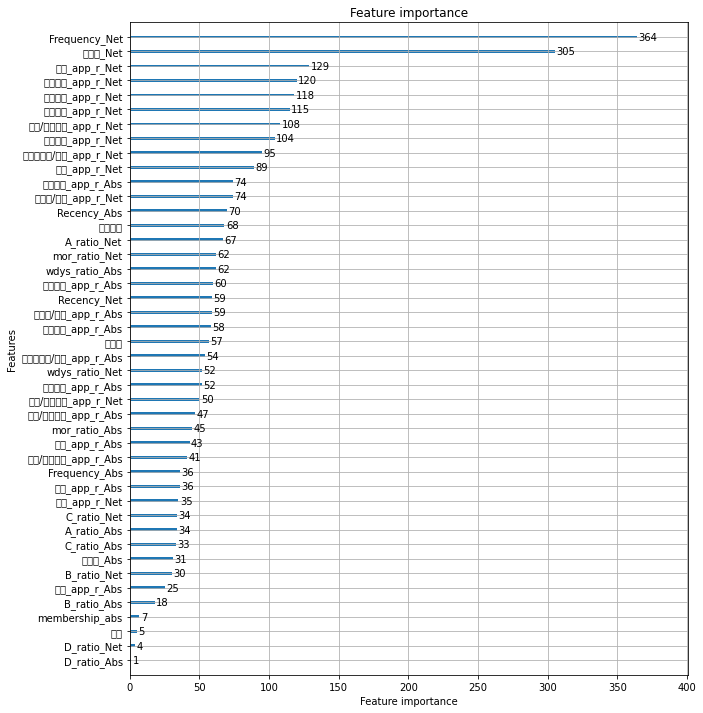

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

In [ ]:
# std
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std.pkl'

In [ ]:
print(train_path)
with open(f'{train_path}', 'rb') as train_read:
  train = pickle.load(train_read)

## Train


print('<Train>')

def get_corr(train, upper_condition_n, most_up_condition_n): 
  cr = train.corr()
  cr_p = cr.unstack()
  cr_v = cr_p.sort_values()
  cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
  A = print(dict(cond))
  return A  
print('corr')
get_corr(train,0.69,1)

print()


from sklearn.model_selection import train_test_split
X = train.drop('target',axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)
svm_pred_proba = svm.predict_proba(X_test)[:,1]

def get_eval(model,y_test,prediction,proba):
    Label = np.unique([y_test, prediction])
    confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                            index=['true:{:}'.format(x) for x in Label], 
                            columns=['pred:{:}'.format(x) for x in Label])
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    roc_auc = roc_auc_score(y_test,proba)
    print('[model]:', model,'\n')
    print('\n[confusion_matrix]\n\n', confusion,'\n')
    print('[accuracy]: {:.4f}'.format(accuracy))
    print('[precision]: {:.4f}'.format(accuracy))
    print('[recall]: {:.4f}'.format(recall))
    print('[f1_score]: {:.4f}'.format(f1))
    print('[roc_auc]: {:.4f}'.format(roc_auc))
    print('-------'*10)



get_eval(svm,y_test,svm_pred,svm_pred_proba)

print()


print(test_path)

# TEST
print('<TEST>')



with open(f'{test_path}', 'rb') as test_read:
  test = pickle.load(test_read)
print('corr')
get_corr(test,0.69,1)
print()


검증 = test.drop('target',axis=1)
정확도검증 = test['target']

gn_svm_pred = svm.predict(검증)
gn_svm_pred_proba = svm.predict_proba(검증)[:,1]
print()

get_eval(svm,정확도검증,gn_svm_pred,gn_svm_pred_proba)

/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std.pkl
<Train>
corr
{}

[model]: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 


[confusion_matrix]

         pred:0  pred:1
true:0    1589     347
true:1     339    1542 

[accuracy]: 0.8203
[precision]: 0.8203
[recall]: 0.8198
[f1_score]: 0.8180
[roc_auc]: 0.9132
----------------------------------------------------------------------

/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std.pkl
<TEST>
corr
{}


[model]: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 


In [ ]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters = {'kernel' : ['linear','poly', 'rbf', 'sigmoid'],'C':[50, 10, 1.0, 0.1, 0.01]}

# gr_svm = GridSearchCV(svm, param_grid=parameters, scoring='accuracy', cv=3, refit=True)

# gr_svm.fit(X_train,y_train)

# best_params = gr_svm.best_params_
# best_score = gr_svm.best_score_
# print(best_params)
# print(best_score)


#{'C': 0.01, 'kernel': 'linear'}
# 0.828595428356267

In [ ]:
gr_svm.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [ ]:
print(train_path)
with open(f'{train_path}', 'rb') as train_read:
  train = pickle.load(train_read)

## Train


print('<Train>')

def get_corr(train, upper_condition_n, most_up_condition_n): 
  cr = train.corr()
  cr_p = cr.unstack()
  cr_v = cr_p.sort_values()
  cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
  A = print(dict(cond))
  return A  
print('corr')
get_corr(train,0.69,1)

print()


from sklearn.model_selection import train_test_split
X = train.drop('target',axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


svm = SVC(kernel='sigmoid',C=1.0, probability=True)
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)
svm_pred_proba = svm.predict_proba(X_test)[:,1]

def get_eval(model,y_test,prediction,proba):
    Label = np.unique([y_test, prediction])
    confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                            index=['true:{:}'.format(x) for x in Label], 
                            columns=['pred:{:}'.format(x) for x in Label])
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    roc_auc = roc_auc_score(y_test,proba)
    print('[model]:', model,'\n')
    print('\n[confusion_matrix]\n\n', confusion,'\n')
    print('[accuracy]: {:.4f}'.format(accuracy))
    print('[precision]: {:.4f}'.format(accuracy))
    print('[recall]: {:.4f}'.format(recall))
    print('[f1_score]: {:.4f}'.format(f1))
    print('[roc_auc]: {:.4f}'.format(roc_auc))
    print('-------'*10)



get_eval(svm,y_test,svm_pred,svm_pred_proba)

print()


print(test_path)

# TEST
print('<TEST>')



with open(f'{test_path}', 'rb') as test_read:
  test = pickle.load(test_read)
print('corr')
get_corr(test,0.69,1)
print()


검증 = test.drop('target',axis=1)
정확도검증 = test['target']

gn_svm_pred = svm.predict(검증)
gn_svm_pred_proba = svm.predict_proba(검증)[:,1]
print()

get_eval(svm,정확도검증,gn_svm_pred,gn_svm_pred_proba)

/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std.pkl
<Train>
corr
{}

[model]: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 


[confusion_matrix]

         pred:0  pred:1
true:0    1522     414
true:1     406    1475 

[accuracy]: 0.7852
[precision]: 0.7852
[recall]: 0.7842
[f1_score]: 0.7825
[roc_auc]: 0.8647
----------------------------------------------------------------------

/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std.pkl
<TEST>
corr
{}


[model]: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=